In [1]:
from sklearn import datasets, metrics,svm,linear_model,tree,ensemble
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv('./weather.csv')

print(data.shape)

print(data.columns)


(119040, 31)
Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')


In [2]:
data.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [3]:

data.head(10)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10001,1942-7-6,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10001,1942-7-7,T,NaN,28.333333,22.777778,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10001,1942-7-8,3.556,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10001,1942-7-9,T,NaN,27.222222,22.777778,25.000000,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10001,1942-7-10,3.556,NaN,25.555556,21.666667,23.333333,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cor=data.corr()
cor

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
STA,1.000000,-0.549603,0.092371,0.059319,0.078112,0.121408,-0.008592,0.000903,-0.832958,-0.549603,...,NaN,NaN,NaN,NaN,-0.139697,NaN,NaN,NaN,NaN,NaN
WindGustSpd,-0.549603,1.000000,-0.124238,0.311690,0.197264,NaN,0.149525,0.002081,0.351027,1.000000,...,NaN,NaN,NaN,NaN,0.063630,NaN,NaN,NaN,NaN,NaN
MaxTemp,0.092371,-0.124238,1.000000,0.878384,0.969048,0.039585,0.031346,-0.005130,0.011875,-0.124238,...,NaN,NaN,NaN,NaN,-0.077015,NaN,NaN,NaN,NaN,NaN
MinTemp,0.059319,0.311690,0.878384,1.000000,0.965425,-0.020733,0.069078,-0.002576,0.525019,0.311690,...,NaN,NaN,NaN,NaN,0.007828,NaN,NaN,NaN,NaN,NaN
MeanTemp,0.078112,0.197264,0.969048,0.965425,1.000000,0.010681,0.050769,-0.004153,0.407395,0.197264,...,NaN,NaN,NaN,NaN,-0.022448,NaN,NaN,NaN,NaN,NaN
YR,0.121408,NaN,0.039585,-0.020733,0.010681,1.000000,-0.144360,-0.011196,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MO,-0.008592,0.149525,0.031346,0.069078,0.050769,-0.144360,1.000000,0.006563,0.655035,0.149525,...,NaN,NaN,NaN,NaN,0.106800,NaN,NaN,NaN,NaN,NaN
DA,0.000903,0.002081,-0.005130,-0.002576,-0.004153,-0.011196,0.006563,1.000000,0.012000,0.002081,...,NaN,NaN,NaN,NaN,0.001121,NaN,NaN,NaN,NaN,NaN
DR,-0.832958,0.351027,0.011875,0.525019,0.407395,NaN,0.655035,0.012000,1.000000,0.351027,...,NaN,NaN,NaN,NaN,0.099215,NaN,NaN,NaN,NaN,NaN
SPD,-0.549603,1.000000,-0.124238,0.311690,0.197264,NaN,0.149525,0.002081,0.351027,1.000000,...,NaN,NaN,NaN,NaN,0.063630,NaN,NaN,NaN,NaN,NaN


In [5]:
#plt.figure(2,figsize=(10,10))
#sns.heatmap(cor,annot=True)

In [6]:
X = data[['MaxTemp']].values.reshape(-1,1)
y = data[['MinTemp']].values.reshape(-1,1)


In [7]:
# divide the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

# create the model 
lm_model = linear_model.LinearRegression()
lm_model = lm_model.fit(X_train,y_train)

y_pred = lm_model.predict(X_test)


# evaluating parametrs
r2score = metrics.r2_score(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('mean square error: ',mse)
print('r2 score: ',r2score)


mean square error:  15.899737090419844
r2 score:  0.770622206918677


<AxesSubplot:ylabel='Density'>

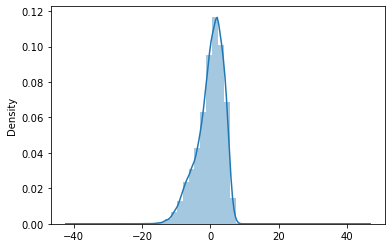

In [8]:
residu = y_test-y_pred

sns.distplot(residu)


In [ ]:

#SVM Regression

X = data['MaxTemp'].values.reshape(-1,1)
y = data['MinTemp'].values.reshape(-1,1)

# divide the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)



svmReg = svm.SVR(kernel='linear')

svmReg = svmReg.fit(X_train,y_train)

ypred = svmReg.predict(X_test)

residu = y_test-y_pred

sns.distplot(residu)

# evaluating parametrs
r2score = metrics.r2_score(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)

print('mean square error: ',mse)
print('r2 score: ',r2score)


# RF,SVM,DT,LR

In [ ]:
X = data['MaxTemp'].values.reshape(-1,1)
y = data['MinTemp'].values.reshape(-1,1)

# divide the data into train and test 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)


Reg=['LinearReg','SVR','DTReg','RFReg']
score=['R2 Score','MSE']

result=np.zeros([2,4])

  
lm_Model=linear_model.LinearRegression()
lm_Model=lm_Model.fit(X_train,y_train)
y_pred_lm=lm_Model.predict(X_test)
residu_Lm = y_test-y_pred_lm
result[0,0] = metrics.r2_score(y_test,y_pred_lm)
result[1,0] = metrics.mean_squared_error(y_test,y_pred_lm)


svm_Reg=svm.SVR(kernel='linear')
svm_Reg = svm_Reg.fit(X_train,y_train)
y_pred_svm=svm_Reg.predict(X_test)
residu_svm = y_test-y_pred_svm
result[0,1] = metrics.r2_score(y_test,y_pred_svm)
result[1,1] = metrics.mean_squared_error(y_test,y_pred_svm)

DT_Reg = tree.DecisionTreeRegressor(criterion='mse',random_state=10)
DT_Reg=DT_Reg.fit(X_train,y_train)
y_pred_DT=DT_Reg.predict(X_test)
residu_DT = y_test-y_pred_DT
result[0,2] = metrics.r2_score(y_test,y_pred_DT)
result[1,2] = metrics.mean_squared_error(y_test,y_pred_DT)

rf_Model = ensemble.RandomForestRegressor(n_estimators=500,criterion='gini',random_state=10)
rf_Model=rf_Model.fit(X_train,y_train)
y_pred_rf=rf_Model.predict(X_test)
residu_rf = y_test-y_pred_rf
result[0,3] = metrics.r2_score(y_test,y_pred_rf)
result[1,3] = metrics.mean_squared_error(y_test,y_pred_rf)

resultFrame=pd.DataFrame(result,index=score,columns=Reg)
print(resultFrame)





In [ ]:
plt.figure(1,figsize=(10,10))
plt.subplot(1,4,1)
sns.distplot(residu_Lm)
plt.subplot(1,4,2)
sns.distplot(residu_svm)
plt.subplot(1,4,3)
sns.distplot(residu_DT)
plt.subplot(1,4,4)
sns.distplot(residu_rf)

